In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
def load_data():
    customers = pd.read_csv("./clean_data/customers.csv")
    geolocation = pd.read_csv("./clean_data/geolocation.csv")
    order_pay = pd.read_csv("./clean_data/order_payments.csv")
    reviews = pd.read_csv("./clean_data/order_reviews.csv")
    orders = pd.read_csv("./clean_data/orders.csv")
    item = pd.read_csv("./clean_data/orders_items.csv")
    category_name = pd.read_csv(
        "./clean_data/product_category_name_translation.csv")
    products = pd.read_csv("./clean_data/products.csv")
    sellers = pd.read_csv("./clean_data/sellers.csv")
    return customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers


In [3]:
# Объединение данных
def merge_data(orders, item, order_pay, reviews, products, customers, sellers, category_name):
    df = orders.merge(item, on='order_id', how='left')
    df = df.merge(order_pay, on='order_id', how='outer', validate='m:m')
    df = df.merge(reviews, on='order_id', how='outer')
    df = df.merge(products, on='product_id', how='outer')
    df = df.merge(customers, on='customer_id', how='outer')
    df = df.merge(sellers, on='seller_id', how='outer')
    df = df.merge(category_name, on="product_category_name", how="left")
    return df

In [4]:
# Очистка данных: удаление строк без customer_unique_id
def filter_customers(df):
    return df[~df["customer_unique_id"].isna()]

In [5]:
# Главная функция пайплайна
def main_pipeline():
    # Шаг 1: Загрузка данных
    customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers = load_data()

    # Шаг 2: Объединение данных
    df = merge_data(orders, item, order_pay, reviews, products,
                    customers, sellers, category_name)

    # Шаг 3: Фильтрация данных
    df = filter_customers(df)

    final_data = df

    return final_data

In [6]:
data = main_pipeline()

In [8]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP,small_appliances
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP,small_appliances
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP,small_appliances
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools


---
### Работаем с количеством покупок

,num_of_orders
count,96096.000000
mean,1.204067
std,0.862057
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,75.000000


,customer_unique_id,num_of_orders
58030,9a736b248f67d166d2fbb006bcb877c3,75
42022,6fbc7cdadbb522125f4b27ae9dee4060,38
93770,f9ae226291893fda10af7965268fb7f6,35
32600,569aa12b73b5f7edeaa6f2a01603e381,26
50192,85963fd37bfd387aa6d915d8a1065486,24
...,...,...
6265,108b1a74b02d1e998850c39d7a7e9150,0
45196,783649d604223aea32afa945a91dda63,0
77740,cef403f888f6bb14ec10e4e02e410893,0
77739,cef3f66c58b52005df2fbba65ba9abdf,0


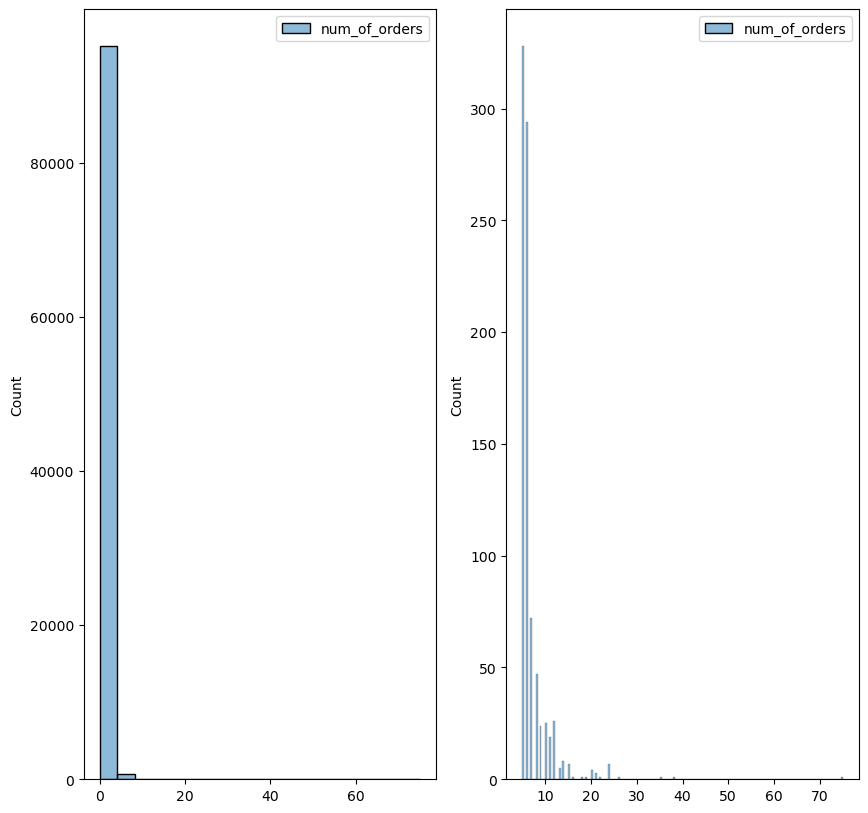

In [56]:
# Количество покупок на покупателя
num_of_orders = data.groupby("customer_unique_id")[
    "order_id"].count().reset_index().rename(columns={"order_id":"num_of_orders"})

display(num_of_orders.describe())

display(num_of_orders.sort_values(by="num_of_orders", ascending=False))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.histplot(num_of_orders, ax=axes[0])
sns.histplot(num_of_orders[num_of_orders["num_of_orders"] > 4], ax=axes[1])
plt.show()

In [57]:
# Предположим, что отсечная черта по количеству покупок равна 4
num_of_orders["consistancy"] = num_of_orders["num_of_orders"].apply(
    lambda x: 1 if x >= 4 else 0)


In [58]:
num_of_orders

,customer_unique_id,num_of_orders,consistancy
0,0000366f3b9a7992bf8c76cfdf3221e2,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,0
2,0000f46a3911fa3c0805444483337064,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,0
4,0004aac84e0df4da2b147fca70cf8255,1,0
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,0
96092,fffea47cd6d3cc0a88bd621562a9d061,1,0
96093,ffff371b4d645b6ecea244b27531430a,1,0
96094,ffff5962728ec6157033ef9805bacc48,1,0


---
### Поработаем со временем покупок (order_purchase_timestamp)

In [75]:
data["order_purchase_timestamp"] = pd.to_datetime(
    data["order_purchase_timestamp"])
first_last_order = data.groupby("customer_unique_id")[
    "order_purchase_timestamp"].agg(["min", "max", "mean"]).reset_index().rename(columns={"min": "first_order", "max": "last_order"})

first_last_order["life_span"] = first_last_order["last_order"] - \
    first_last_order["first_order"]
    
first_last_order[first_last_order["life_span"].dt.days == 0]

,customer_unique_id,first_order,last_order,mean,life_span
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,2018-05-10 10:56:27,0 days
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,2018-05-07 11:11:27,0 days
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-10 21:05:03,0 days
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,2017-10-12 20:29:41,0 days
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,2017-11-14 19:45:42,0 days
...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,2017-06-08 21:00:36,0 days
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,2017-12-10 20:07:56,0 days
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,2017-02-07 15:49:16,0 days
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,2018-05-02 15:17:41,0 days


In [89]:
num_of_orders[num_of_orders["num_of_orders"] > 2]

,customer_unique_id,num_of_orders,consistancy
22,000fbf0473c10fc1ab6f8d2d286ce20c,4,1
158,0064a1b5f5cddd047c987b988a90c8c1,4,1
203,0085139b503668b3addcfe826d91be8d,3,0
226,0096c18412349537abc45e350581cbbc,4,1
231,0097fca0db567f5ca79509b7b4fc1c2d,7,1
...,...,...,...
95963,ff9ff869636c26565ded16038be5fa7d,3,0
95998,ffbb6557e45f7158781514f0efddb0d5,4,1
96060,ffe780a8995715d9560ca10f3351710f,3,0
96079,fff22793223fe80c97a8fd02ac5c6295,3,0
